> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the `Project Details` page of `Investigate a Dataset` lesson for this course. List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 

  The choosen dataset contains data of 10,000 movies from The Movie Database (TMDb).

##### The column names in the dataset are listed below and explains the data they hold:
- **_id_** - movie id
- **_imdb_id_** - imdb id
- **_popularity_** - how popular the movie is
- **_budget_** - amount of money spent to make the movie
- **_revenue_** - income recieved for making the movie
- **_original_title_** - title of the movie
- **_cast_** - the main actors and actresses in the movie
- **_homepage_** - website showing information about movie
- **_director_** - movie director
- **_tagline_** - quote from movie
- **_keywords_** - keywords about movie
- **_overview_** - explaination of what movie is about
- **_runtime_** - minutes the movie lasted
- **_genres_** - genres that movies fit in
- **_production_companies_** - companies that funded creating the movie
- **_release_date_** - date movie was released
- **_vote_count_** - amount of votes for movie
- **_vote_average_** - average of votes for movie
- **_release_year_** - year movie was released
- **_budget_adj_** - amount of money spent to make movie in terms of 2010 dollars
- **_revenue_adj_** - amount of money earned from making movie in terms of 2010 dollars 

### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

### 1. Which genres are most popular from 2008 to 2011?
### 2. What kinds of properties are associated with movies that have high revenues?
### 3. Which actor played in the most movies: Tom Cruise, Dylan O'Brien, Emma Watson, or Jennifer Lawrence?

In [305]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd

# While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations initially. This does not have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, trim the excess and organize your steps so that you have a flowing, cohesive report.

### **Cell 1:**

In [143]:
# Load your data and print out a few lines. What is the size of your dataframe? 
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.

df = pd.read_csv('tmdb-movies.csv') # loads csv file
df.head() # displays first 5 lines of raw data

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### **Cell 2:**

In [144]:
df['keywords'] # displays "keywords" column data (ONLY column that was NOT SHOWN)

0        monster|dna|tyrannosaurus rex|velociraptor|island
1         future|chase|post-apocalyptic|dystopia|australia
2        based on novel|revolution|dystopia|sequel|dyst...
3                    android|spaceship|jedi|space opera|3d
4                      car race|speed|revenge|suspense|car
                               ...                        
10861                             surfer|surfboard|surfing
10862                            car race|racing|formula 1
10863                             car|trolley|stealing car
10864                                                spoof
10865                  fire|gun|drive|sacrifice|flashlight
Name: keywords, Length: 10866, dtype: object

### **Cell 3:**

In [200]:
df.shape # displays size of dataframe 

(10866, 21)

### **Cell 4:**

In [210]:
df.count() # displays amount of NON-missing data in each column (only want to know LOCATION of null values in Columns)

# if ".isnull()", "isna()", or ".notnull()" is used, it will display "True" or "False" in columns

id                      10866
imdb_id                 10866
popularity              10866
budget                  10866
revenue                 10866
original_title          10866
cast                    10866
homepage                10866
director                10866
tagline                 10866
keywords                10866
overview                10866
runtime                 10866
genres                  10866
production_companies    10866
release_date            10866
vote_count              10866
vote_average            10866
release_year            10866
budget_adj              10866
revenue_adj             10866
dtype: int64

##### The data above displays the amount of data values each column has. Since the dataset has 10866 rows, any column that has less than 10866 data values has null values. This shows that the following columns have null values: **imdb_id**, **cast**, **homepage**, **director**, **tagline**, **keywords**, **overview, genres, and production_companies.


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

### **Cell 1:**

In [221]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

df.fillna(0)#, inplace=True) # replaces null values with 0 (MUST USE "inplace=True" TO ENSURE DATA FRAME IS MODIFIED)
df[['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies']].tail() # displays last 5 lines of raw data for columns: 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', and 'production_companies'

,imdb_id,cast,homepage,director,tagline,keywords,overview,genres,production_companies
10861,tt0060371,Michael Hynson|Robert August|Lord 'Tally Ho' B...,0,Bruce Brown,0,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",Documentary,Bruce Brown Films
10862,tt0060472,James Garner|Eva Marie Saint|Yves Montand|Tosh...,0,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...
10863,tt0060161,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,0,Eldar Ryazanov,0,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,Mystery|Comedy,Mosfilm
10864,tt0061177,Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,0,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",Action|Comedy,Benedict Pictures Corp.
10865,tt0060666,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,0,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,fire|gun|drive|sacrifice|flashlight,A family gets lost on the road and stumbles up...,Horror,Norm-Iris


##### Since the previous code cell confirmed that the dataset has null values, those null values, _NaN_, need to be replaced with a reasonable value. The first line of code in the cell above replaces the null values with 0. The second line of code displays the last five rows of raw data to show where some of the null values have been replaced with 0. If a row has a data value of 0, it means the row does not have the data about the movie pertaining to the column it is under.

### **Cell 2:**

In [217]:
#df.duplicated(keep=True) # shows DUPLICATED rows (returns ERROR)

duplicated_rows = df[df.duplicated()] # obtains duplicated rows ONLY
print(duplicated_rows) # displays duplicated rows

         id    imdb_id  popularity    budget  revenue original_title  \
2090  42194  tt0411951     0.59643  30000000   967000         TEKKEN   

                                                   cast homepage  \
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...        0   

              director              tagline  ...  \
2090  Dwight H. Little  Survival is no game  ...   

                                               overview runtime  \
2090  In the year of 2039, after World Wars destroy ...      92   

                                           genres    production_companies  \
2090  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   

     release_date vote_count  vote_average  release_year  budget_adj  \
2090      3/20/10        110           5.0          2010  30000000.0   

      revenue_adj  
2090     967000.0  

[1 rows x 21 columns]


##### In the code cell above, the first line of code searches and obtains rows with duplicated data in the dataset. The second line of code displays any duplicated rows that were found. The result from the code cell shows that row 2090 is the only duplicated row in the dataset.

### **Cell 3:**

In [219]:
sum(df.duplicated()) # displays amount of duplicated rows

1

##### The code in _Cell 3_ displays the total amount of duplicated rows in the dataset. The result shows that there is only **1** duplicated row in the dataset, confirming that row 2090 is the only duplicated row.

### **Cell 4:**

In [223]:
df.drop_duplicates()#inplace=False) # drops or deletes duplicated rows (MUST USE "inplace=False" TO ENSURE DATA FRAME IS MODIFIED)
df.iloc[[2089, 2090, 2091]] # displays rows 2089-2091 to check if row 2090 was dropped

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.596430,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,0,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.596430,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,0,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2091,60309,tt0968264,0.591206,25000000,15478800,The Conspirator,Evan Rachel Wood|James McAvoy|Kevin Kline|Robi...,http://www.conspiratorthemovie.com/,Robert Redford,One bullet killed the President. But not one man.,...,Mary Surratt is the lone female charged as a c...,122,Crime|Drama|History,Wildwood Enterprises|American Film Company,9/10/10,78,5.9,2010,25000000.0,15478800.0


##### Since there is one duplicated cell in the dataset, it needs to be removed. In _Cell 4_, the first line of code drops the duplicated row in the dataset. The second line displays rows 2089, 2090, and 2091. The second code line is used to confirm if row 2090 was dropped.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. Remember to utilize the visualizations that the pandas library already has available.



> **Tip**: Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Which genres are most popular from 2008 to 2011?

#### **Cell 1:**

In [475]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

df_2008 = df[df['release_year'] == 2008] # creates dataframe with movies released in 2008
df_2009 = df[df['release_year'] == 2009] # creates dataframe with movies released in 2009
df_2010 = df[df['release_year'] == 2010] # creates dataframe with movies released in 2010
df_2011 = df[df['release_year'] == 2011] # creates dataframe with movies released in 2011

The code in _Cell 1_ creates four dataframes to hold the movies released during 2008-2011 separately. (**ADD REASON FOR DOING THIS LATER**)

#### **Cell 2:**

In [495]:
action_genre = df_2008['genres'].str.contains('Action', regex=False) # checks if "genres" column has "Action" ("regex=False" makes case-insensitive)
adventure_genre = df_2008['genres'].str.contains('Adventure', regex=False) # checks if row has "Adventure" genre
animation_genre = df_2008['genres'].str.contains('Animation', regex=False) # checks if row has "Animation" genre
comedy_genre = df_2008['genres'].str.contains('Comedy', regex=False) # checks if Value In Column contains "Comedy"
crime_genre = df_2008['genres'].str.contains('Crime', regex=False) # checks if Value In Column contains "Crime"
drama_genre = df_2008['genres'].str.contains('Drama', regex=False) # checks if row has "Drama" ("regex=False" makes case-insensitive & MUST INCLUDE .str.)
documentary_genre = df_2008['genres'].str.contains('Documentary', regex=False) # checks if row has "Documentary" genre
family_genre = df_2008['genres'].str.contains('Family', regex=False) # checks if Value In Column contains "Family"
fantasy_genre = df_2008['genres'].str.contains('Fantasy', regex=False) # checks if Value In Column contains "Fantasy"
foreign_genre = df_2008['genres'].str.contains('Foreign', regex=False) # checks if row has "Foregin" genre
history_genre = df_2008['genres'].str.contains('History', regex=False) # checks if Value In Column contains "History"
horror_genre = df_2008['genres'].str.contains('Horror', regex=False) # checks if Value In Column contains "Horror"
music_genre = df_2008['genres'].str.contains('Music', regex=False) # checks if row has "Music" genre
mystery_genre = df_2008['genres'].str.contains('Mystery', regex=False) # checks if row contains "Mystery"
romance_genre = df_2008['genres'].str.contains('Romance', regex=False) # checks if row has "Romance" genre
science_fiction_genre = df_2008['genres'].str.contains('Science Fiction', regex=False) # checks if Value In Column contains "Science Fiction"
thriller_genre = df_2008['genres'].str.contains('Thriller', regex=False) # checks if row has "Thriller" ("regex=False" makes case-insensitive & MUST INCLUDE .str.)
TV_movie_genre = df_2008['genres'].str.contains('TV Movie', regex=False) # checks if row has "TV Movie"
war_genre = df_2008['genres'].str.contains('War', regex=False) # checks if row has "War" genre

genre_types = [action_genre, adventure_genre, animation_genre, comedy_genre, crime_genre, drama_genre, documentary_genre, family_genre, fantasy_genre, foreign_genre, history_genre, horror_genre, music_genre, mystery_genre, romance_genre, science_fiction_genre, thriller_genre, TV_movie_genre, war_genre] # holds all genre types

Checks which values in the "genres" column have _Action_, _Comedy_, _Crime_, _Drama_, _Family_, _Fantasy_, _History_, _Horror_, _Science Fiction_, _Thriller_ in it (**FIX**)

I had to use _.contains()_ instead of _.isin()_ because _.isin()_ checks if the value matches the word it is searching for whereas _.contains()_ checks if the word is present in the value (**TEMPORARY NOTE**)

#### **Cell 3:**

In [590]:
action_popularity_2008 = df_2008.loc[action_genre==True, 'popularity'] # access Popularity if movie is Action
print(action_popularity_2008) # TESTING CODE

adventure_popularity_2008 = df_2008.loc[adventure_genre==True, 'popularity'] # access Popularity if movie is Adventure
print(adventure_popularity_2008) # TESTING CODE

animation_popularity_2008 = df_2008.loc[animation_genre==True, 'popularity'] # access Popularity if movie is Animation
print(animation_popularity_2008) # TESTING CODE

comedy_popularity_2008 = df_2008.loc[comedy_genre==True, 'popularity'] # access Popularity if movie is Comedy
print(comedy_popularity_2008) # TESING CODE

crime_popularity_2008 = df_2008.loc[crime_genre==True, 'popularity'] # access Popularity if movie is Crime
print(crime_popularity_2008) # TESING CODE

drama_popularity_2008 = df_2008.loc[drama_genre==True, 'popularity'] # access Popularity if movie is Drama
print(drama_popularity_2008) # TESTING CODE

documentary_popularity_2008 = df_2008.loc[documentary_genre==True, 'popularity'] # access Popularity if movie is Documentary
print(documentary_popularity_2008) # TESTING CODE (print ARRAY)

family_popularity_2008 = df_2008.loc[family_genre==True, 'popularity'] # access Popularity if movie is Family
print(family_popularity_2008) # TESTING CODE (print ARRAY)

fantasy_popularity_2008 = df_2008.loc[fantasy_genre==True, 'popularity'] # accesses Popularity if movie is Fantasy
print(fantasy_popularity_2008) # TESTING CODE (print ARRAY)

foreign_popularity_2008 = df_2008.loc[foreign_genre==True, 'popularity'] # accesses Popularity if movie is Foreign
print(foreign_popularity_2008) # TESTING CODE (print ARRAY)

history_popularity_2008 = df_2008.loc[history_genre==True, 'popularity'] # accesses Popularity if movie is History
print(history_popularity_2008) # TESTING CODE (print ARRAY)

horror_popularity_2008= df_2008.loc[horror_genre==True, 'popularity'] # accesses Popularity if movie is Horror
print(horror_popularity_2008) # TESTING CODE (print ARRAY)

music_popularity_2008 = df_2008.loc[music_genre==True, 'popularity'] # accesses Popularity if movie is Music
print(music_popularity_2008) # TESTING CODE (print ARRAY)

mystery_popularity_2008 = df_2008.loc[mystery_genre==True, 'popularity'] # accesses Popularity if movie is Mystery
print(mystery_popularity_2008) # TESTING CODE (print ARRAY)

romance_popularity_2008 = df_2008.loc[romance_genre==True, 'popularity'] # accesses Popularity if movie is Romance
print(romance_popularity_2008) # TESTING CODE (print ARRAY)

science_fiction_popularity_2008 = df_2008.loc[science_fiction_genre==True, 'popularity'] # accesses Popularity if movie is Science Fiction
print(science_fiction_popularity_2008) # TESTING CODE (print ARRAY)

thriller_popularity_2008 = df_2008.loc[thriller_genre==True, 'popularity'] # accesses Popularity if movie is Thriller
print(thriller_popularity_2008) # TESTING CODE (print ARRAY)

TV_movie_popularity_2008 = df_2008.loc[TV_movie_genre==True, 'popularity'] # accesses Popularity if movie is TV Movie
print(TV_movie_popularity_2008) # TESTING CODE (print ARRAY)

war_popularity_2008 = df_2008.loc[war_genre==True, 'popularity'] # accesses Popularity if movie is War
print(war_popularity_2008) # TESTING CODE (print ARRAY)

2875    8.466668
2877    4.977955
2878    3.647612
2879    3.161670
2881    3.086676
          ...   
3295    0.128781
3297    0.133564
3303    0.113456
3307    0.107245
3326    0.085583
Name: popularity, Length: 99, dtype: float64
2877    4.977955
2879    3.161670
2880    3.107665
2881    3.086676
2883    2.900470
          ...   
3268    0.156827
3290    0.132306
3297    0.133564
3312    0.101733
3351    0.033634
Name: popularity, Length: 63, dtype: float64
2876    5.678119
2882    3.036644
2889    2.217084
2894    1.975355
2913    1.480497
2952    0.957704
2959    0.905428
2960    0.900342
2965    0.865105
2970    0.822831
2987    0.730324
3014    0.630893
3019    0.611016
3020    0.606700
3022    0.598830
3032    0.574813
3039    0.540913
3041    0.534059
3061    0.480116
3070    0.466771
3072    0.459885
3074    0.456683
3089    0.421518
3097    0.256180
3103    0.397358
3106    0.395118
3189    0.268271
3198    0.259988
3241    0.204302
3244    0.376053
3302    0.115990
3355    0

The code in _Cell 3_ uses the booleans in _Cell 2_ to classify the movie popularity amounts for each genre. (**FIX**)

#### **Cell 4:**

In [593]:
df_genre_popularity = pd.DataFrame({'Action_popularity' : [0], 'Adventure_popularity' : [0], 
                                   'Animation_popularity' : [0], 'Comedy_popularity' : [0], 
                                   'Crime_popularity' : [0], 'Drama_popularity' : [0], 
                                   'Documentary_popularity' : [0], 'Family_popularity' : [0], 
                                   'Fantasy_popularity' : [0], 'Foreign_popularity' : [0], 
                                   'History_popularity' : [0], 'Horror_popularity' : [0], 
                                   'Music_popularity' : [0], 'Mystery_popularity' : [0], 
                                   'Romance_popularity' : [0], 'Science Fiction_popularity' : [0], 
                                   'Thriller_popularity' : [0], 'TV Movie_popularity' : [0], 
                                   'War_popularity' : [0]},
                                  index = [2008, 2009, 2010, 2011]) # creates dataframe for popularity of each genre types
df_genre_popularity # displays dataframe for genre popularity

,Action_popularity,Adventure_popularity,Animation_popularity,Comedy_popularity,Crime_popularity,Drama_popularity,Documentary_popularity,Family_popularity,Fantasy_popularity,Foreign_popularity,History_popularity,Horror_popularity,Music_popularity,Mystery_popularity,Romance_popularity,Science Fiction_popularity,Thriller_popularity,TV Movie_popularity,War_popularity
2008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


The code in _Cell 4_ creates a new dataframe to hold the total popularity amount for each genre. 

In order to find the most popular genres in 2008 graph (**FINISH EXPLAINING REASON FOR CODE**)

#### **Cell 5:**

In [605]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

df_genre_popularity = pd.DataFrame({'2008' : [2, 3, 20, 78, 
                                                6, 7, 85, 87, 
                                               32, 46, 21, 97, 79, 
                                               65, 54, 45, 13, 
                                               23, 46], 
                                   '2009' : [12, 30, 10, 71, 
                                                60, 12, 87, 37, 
                                               36, 31, 29, 17, 89, 
                                               69, 50, 15, 23, 
                                               93, 96],
                                   '2010' : [1, 2, 3, 4, 
                                                6, 7, 5, 8, 
                                               9, 10, 11, 12, 13, 
                                               14, 15, 16, 17, 
                                               18, 19],
                                   '2011' : [20, 19, 18, 17, 
                                                13, 14, 15, 16, 
                                               12, 11, 9, 8, 7, 
                                               3, 4, 5, 6, 
                                               2, 1]},
                                  index = ['Action', 'Adventure', 'Animation', 'Comedy', 
                                                'Crime', 'Drama', 'Documentary', 'Family', 
                                               'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 
                                               'Mystery', 'Romance', 'Science Fiction', 'Thriller', 
                                               'TV Movie', 'War']) 
# creates dataframe to hold genre types, popularity

df_genre_popularity # displays genre popularity dataframe

,2008,2009,2010,2011
Action,2,12,1,20
Adventure,3,30,2,19
Animation,20,10,3,18
Comedy,78,71,4,17
Crime,6,60,6,13
Drama,7,12,7,14
Documentary,85,87,5,15
Family,87,37,8,16
Fantasy,32,36,9,12
Foreign,46,31,10,11


In [ ]:



#popularity_action_total

genre_types = [action_genre, adventure_genre, animation_genre, comedy_genre, crime_genre, drama_genre, documentary_genre, family_genre, fantasy_genre, foreign_genre, history_genre, horror_genre, music_genre, mystery_genre, romance_genre, science_fiction_genre, thriller_genre, TV_movie_genre, war_genre] # holds all genre types


#df_genre_popularity

Plots popularity during 2008-2011

#### **Cell 6:**

<Axes: >

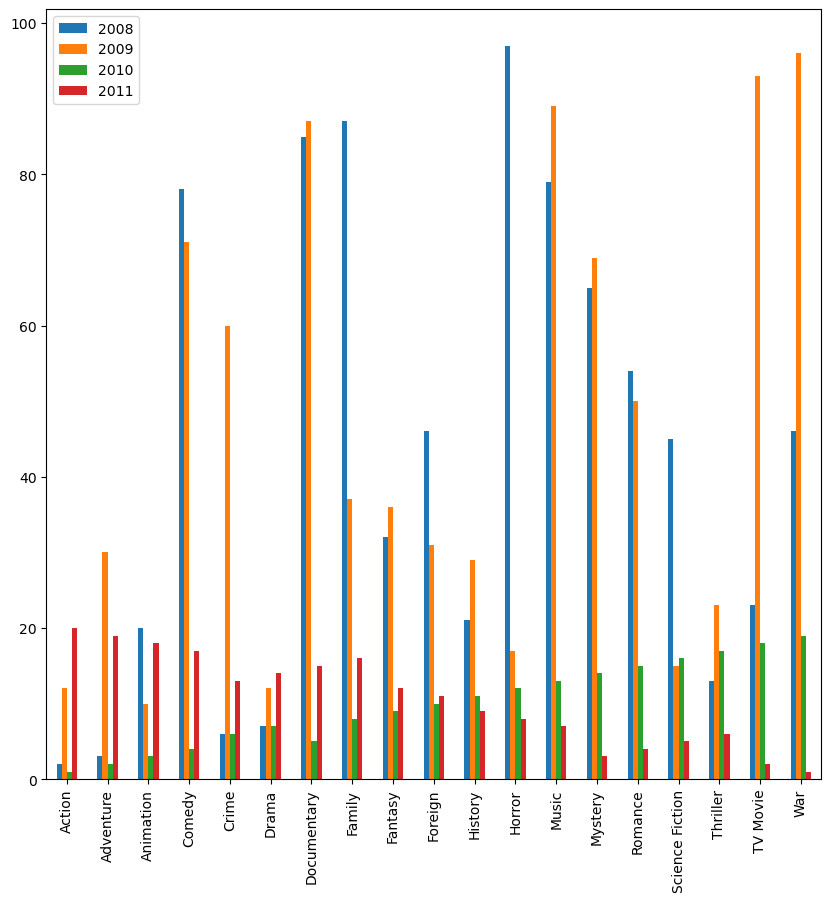

In [604]:
df_genre_popularity.plot.bar(rot=90, figsize=(10,10)) # creates & displays bar graph for "df_genre_popularity" ("rot=90" ensures x-axis label is vertical, so labels can be read)

Plots amount of movies each year

#### **Cell 7:**

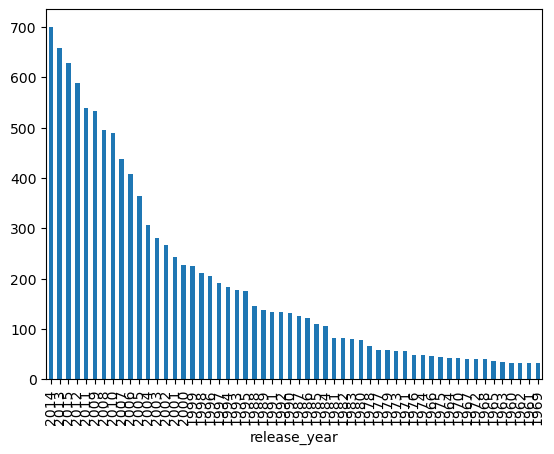

In [471]:
ind = df['release_year'].value_counts().index # [2008, 2009, 2010, 2011]
df['release_year'].value_counts()[ind].plot(kind='bar');

Plots movie genres released during 2008, 2009, 2010, and 2011



#### **Cell 8:**

In [469]:
years_to_include = [2008, 2009, 2010, 2011] # obtains years 2008-2011 to be included in chart only
filtered_years = df[df['release_year'].isin(years_to_include)] # finds years in 'release_year' column

#df.plot(x='genres', y=filtered_years, kind='bar');
#ind = df['release_year'].value_counts().index # 
filtered_years.plot.bar(x='release_year', y='popularity')

ind = df['genres'].value_counts().index # [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
df['genres'].value_counts()[ind].plot(kind='bar');

Searches for movies released during 2008, 2009, 2010, 2011 (**FIX LATER or use later**)

### What kinds of properties are associated with movies that have high revenues?

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


### Which actor played in the most movies: Tom Cruise, Dylan O'Brien, Emma Watson, or Jennifer Lawrence?"

#### **Cell 1:**

In [440]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

TC_cast = df['cast'].str.contains('Tom Cruise') # checks if "cast" holds 'Tom Cruise'
DB_cast = df['cast'].str.contains("Dylan O'Brien") # checks if "cast" holds "Dylan O'Brien"
EW_cast = df['cast'].str.contains('Emma Watson') # checks if "cast" holds 'Emma Watson'
JL_cast = df['cast'].str.contains('Jennifer Lawrence') # checks if "cast" holds 'Jennifer Lawrence'

The code in the cell above searches the _cast_ column for the names of the four actors: **Tom Cruise**, **Dylan O'Brien**, **Emma Watson**, and **Jennifer Lawrence**. The analysis question requires information pertaining to the four actors and the movies they starred in. Therefore, the code is used to find what movies the four actors starred in by checking if four actors are in the _cast_ column of each movie.

#### **Cell 2:**

In [448]:
TC_movies = TC_cast.sum() # finds movie amount "Tom Cruise" played in
DB_movies = DB_cast.sum() # find movie amount "Dylan O'Brien" played in
EW_movies = EW_cast.sum() # finds movie amount "Emma Watson" played in
JL_movies = JL_cast.sum() # finds movie amount "Jennifer Lawrence" played in

The code in _Cell 2_ finds the amount of movies each actor played in. In order to solve the question, the amount of movies each actor played in must be acquired first.

#### **Cell 3:**

In [503]:
df_movie_and_actors = pd.DataFrame({'Actors' : ['Tom Cruise', "Dylan O'Brien", 'Emma Watson', 'Jennifer Lawrence'], 
                                    'movies' : [TC_movies, DB_movies, EW_movies, JL_movies]},
                                      index=['Tom Cruise', "Dylan O'Brien", 'Emma Watson', 'Jennifer Lawrence']) # creates new dataframe to hold actors & movie amounts

The code in _Cell 3_ first creates a new dataframe holding the names of the four actors, the amount of movies they acted in, and an index holding the actors' names. This dataframe will be used create the graphs that will be used to answer the third analysis question.

#### **Cell 4:**

Text(0, 0.5, 'Number of Movies')

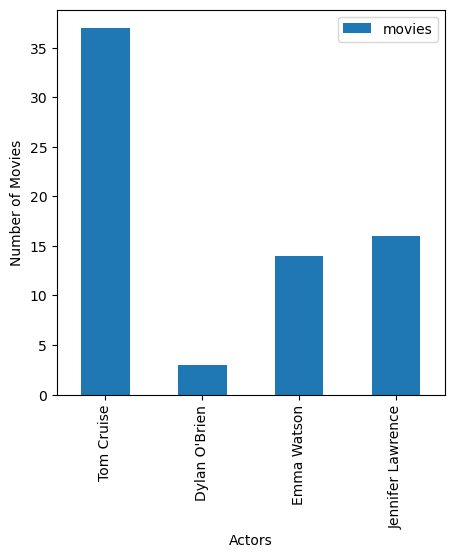

In [505]:
df_movie_and_actors.plot.bar(x='Actors', y='movies', figsize=(5,5)) # displays bar graph
plt.ylabel('Number of Movies') # adds y-axis label to graph

The code in _Cell 4_ displays a bar graph showing how many movies each actor starred in. The result shows that **_Tom Cruise_** starred in the most movies.

#### **Cell 5:**

<Axes: ylabel='movie amount'>

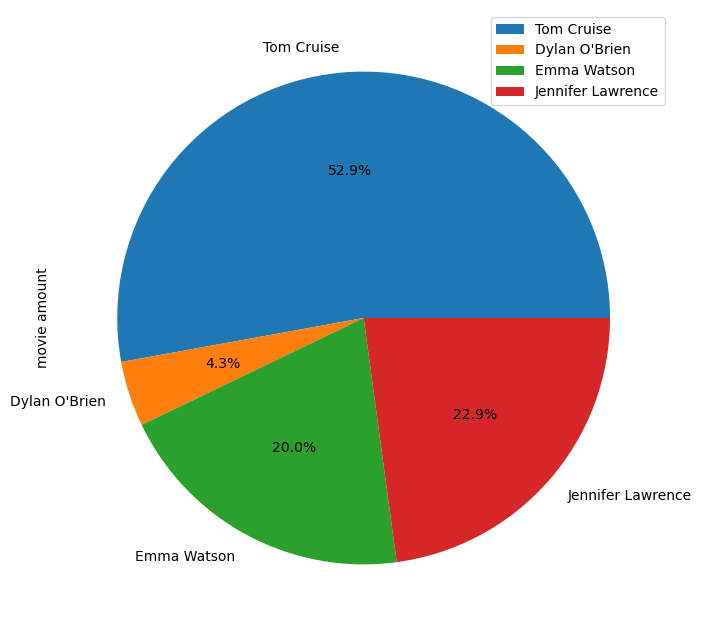

In [457]:
df_movie_and_actors.plot.pie(y='movie amount', figsize=(8,8), autopct='%1.1f%%') # displays pie chart (autopct='%1.1f%%' shows percentage)

The code in _Cell 5_ displays a pie chart of the percentage of movies that each actor starred in. This chart takes the total amount of movies that all four actors starred in and compares the percentages to each other, further proving that **_Tom Cruise_** starred in the most movies.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should see output that starts with `NbConvertApp] Converting notebook`, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb